In [1]:
%matplotlib inline
import sys
from IPython.display import display
from pathlib import Path as path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import Colorbar
import xarray as xr
import spectrochempy as scp
from spectrochempy import ur
import hyperspy.api as hs
import scipy

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.9© Copyright 2014-2025 - A.Travert & C.Fernandez @ LCS


In [2]:
# 画图的初始设置
plt.style.use(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-python\Figure\liuchzzyy.mplstyle')
# display(plt.style.available)
plt.style.use('default')

# 颜色设定
sys.path.append(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Python\Figure')
from colors import tol_cmap, tol_cset
colors = list(tol_cset('vibrant'))
if r'sunset' not in plt.colormaps():
    plt.colormaps.register(tol_cmap('sunset'))
if r'rainbow_PuRd' not in plt.colormaps():
    plt.colormaps.register(tol_cmap('rainbow_PuRd')) # 备用 plasma

# 输出的文件夹
path_out = path(r"C:\Users\chengliu\Desktop\Figure")

# V4

### Operando Data,除去 Mn2+ 的部分, pre-edge 数据获取

In [ ]:
# 读取数据
path_file = path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\XAS\Operando\αMnO2\XAS\CLAESS\2022-10\Results\cell3\PaperUno\Oct2022_cell3_P2a\XANES\Mn\TrialsOne_αMnO2_Pristine\MCR')
Mn_raw = xr.open_dataset(path.joinpath(path_file, r'Raw_data.NETCDF4'), engine='h5netcdf')
Mn_mcr_2_hm = xr.open_dataset(path.joinpath(path_file, r'PcaMcr_onereaction_2e_data.NETCDF4'), engine='h5netcdf')

In [ ]:
MnO2_rest = Mn_raw['Raw_spectrum'].sel(Energy=slice(Mn_mcr_2_hm['Energy'].data[0], Mn_mcr_2_hm['Energy'].data[-1])).data - (Mn_mcr_2_hm['MCR_HM_C'][:,1]*Mn_mcr_2_hm['MCR_HM_St'][1,:]).data.T

MnO2_Rest = xr.DataArray(
    data=MnO2_rest,
    coords={
        'Spectrum': range(MnO2_rest.shape[1]),
        'Energy': Mn_raw['Raw_spectrum'].sel(Energy=slice(Mn_mcr_2_hm['Energy'].data[0], Mn_mcr_2_hm['Energy'].data[-1]))['Energy'],
    },
    dims=['Energy', 'Spectrum'],
    name = r'MnO2_Rest',
)

#### PCA 降噪

In [ ]:
MnO2_rest = scp.NDDataset(data=MnO2_Rest.data.T,
                     name="opPre_Edge_Mn_Oct2022",
                     author="Cheng Liu, and Dino Tonti",
                     description="XANES obtained from CLAESS, alba, July2023",
                     history="creation",
                     title='absorption',
                     units=ur.absorbance)

MnO2_rest.y = scp.Coord.arange(MnO2_Rest['Spectrum'].shape[0], title='sperctum number')
MnO2_rest.x = scp.Coord(MnO2_Rest.coords['Energy'], title='Energy', units=ur.eV)

MnO2_rest_denoise = scp.denoise(MnO2_rest)
MnO2_Rest_Denoise = MnO2_rest_denoise.to_xarray().rename('MnO2_Rest_Denoise')
MnO2_Rest_Denoise.attrs['units'] = r'a.u.'
MnO2_rest_denoise.plot()

In [ ]:
# 保存数据
xr.merge([Mn_raw['Raw_spectrum'], Mn_raw['Raw_ref'], Mn_mcr_2_hm['MCR_HM_C'], Mn_mcr_2_hm['MCR_HM_St'], MnO2_Rest, MnO2_Rest_Denoise],).to_netcdf(path.joinpath(path_out, r'opPreEdge_Mn.NETCDF4'), engine="h5netcdf")

MnO2_Rest1 = MnO2_Rest.to_pandas()
MnO2_Rest1.columns = Mn_raw['Spectrum'].data
MnO2_Rest1.reset_index().to_csv(path.joinpath(path_out, r'opPreEdge_Mn_No_Mn_2.csv'), header=True, index=False)

MnO2_Rest_Denoise1 = MnO2_Rest_Denoise.to_pandas().T
MnO2_Rest_Denoise1.columns = Mn_raw['Spectrum'].data
MnO2_Rest_Denoise1.reset_index().to_csv(path.joinpath(path_out, r'opPreEdge_Mn_No_Mn_2_denoise.csv'), header=True, index=False)

In [ ]:
%matplotlib inline
plt.close('all')

fig = plt.figure(figsize=(7.0, 2.5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=None, wspace=0, hspace=0, figure=fig)

xascolors = [colors[0], colors[4]]
labels = [r'0.2M Mn$\mathrm{^{2\!+}}$', r'${\alpha}$MnO$\mathrm{_2}$']
Mn_cmap = ListedColormap(mpl.colormaps['sunset'](np.linspace(0.5, 1.0, MnO2_Rest.shape[1])), name='Mn_cmap', )

# 图 A
subfig = fig.add_subfigure(gs[0, 0])
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

for i in range(2):
    ax.plot(Mn_raw['Energy'].sel(Energy=slice(6537.5, 6550.5)), Mn_raw['Raw_ref'].sel(Energy=slice(6537.5, 6550.5))[:, i], c=xascolors[i], ls='--', lw=1.0, label=labels[i], zorder=5)
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.03), ncols=1, frameon=False, labelcolor='linecolor', fontsize=10)

for i in range(Mn_raw['Raw_spectrum'].shape[1]):
    ax.plot(Mn_raw['Energy'].sel(Energy=slice(6537.5, 6550.5)), Mn_raw['Raw_spectrum'].sel(Energy=slice(6537.5, 6550.5))[:, i], c=Mn_cmap.colors[i], ls='-', lw=1.0)
    
ax.set_xlim(6537.5, 6550.5)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1, offset=0))
ax.set_ylim(0, 0.3)
ax.set_ylabel(r"Absorption (arb.u.)", fontsize=11)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.06))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.03))
ax.tick_params(axis='both', labelsize=9) 

colorbar = Colorbar(ax=ax.inset_axes((0.65, 0.05, 0.3, 0.06)), location='bottom', orientation='horizontal', cmap=Mn_cmap, ticklocation='top', spacing = 'proportional', drawedges=False)
colorbar.set_ticks([])

ax.text(0.65, 0.18, 'OCV', transform=ax.transAxes, fontsize=9, va='top', ha='left', fontfamily='Arial', )
ax.text(0.86, 0.18, '0.9 V', transform=ax.transAxes, fontsize=9, va='top', ha='left', fontfamily='Arial', )

# 图 B
subfig = fig.add_subfigure(gs[0, 1])
ax = subfig.add_subplot()
ax.set_position((0.3, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

for i in range(2):
    ax.plot(Mn_raw['Energy'].sel(Energy=slice(6537.5, 6550.5)), Mn_raw['Raw_ref'].sel(Energy=slice(6537.5, 6550.5))[:, i], c=xascolors[i], ls='--', lw=1.0, label=labels[i], zorder=1)
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.03), ncols=1, frameon=False, labelcolor='linecolor', fontsize=10)

for i in range(MnO2_Rest.shape[1]):
    ax.plot(MnO2_Rest['Energy'].sel(Energy=slice(6537.5, 6550.5)), MnO2_Rest.sel(Energy=slice(6537.5, 6550.5))[:, i], c=Mn_cmap.colors[i], ls='-', lw=1.0)
    
ax.set_xlim(6537.5, 6550.5)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1, offset=0))
ax.set_ylim(0, 0.12)
ax.set_ylabel(r"Absorption (arb.u.)", fontsize=11)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.03))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.015))
ax.tick_params(axis='both', labelsize=9) 

colorbar = Colorbar(ax=ax.inset_axes((0.65, 0.05, 0.3, 0.06)), location='bottom', orientation='horizontal', cmap=Mn_cmap, ticklocation='top', spacing = 'proportional', drawedges=False)
colorbar.set_ticks([])

ax.text(0.65, 0.18, 'OCV', transform=ax.transAxes, fontsize=9, va='top', ha='left', fontfamily='Arial', )
ax.text(0.86, 0.18, '0.9 V', transform=ax.transAxes, fontsize=9, va='top', ha='left', fontfamily='Arial', )

# 图 C
subfig = fig.add_subfigure(gs[0, 2])
ax = subfig.add_subplot()
ax.set_position((0.6, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

for i in range(2):
    ax.plot(Mn_raw['Energy'].sel(Energy=slice(6537.5, 6550.5)), Mn_raw['Raw_ref'].sel(Energy=slice(6537.5, 6550.5))[:, i], c=xascolors[i], ls='--', lw=1.0, label=labels[i], zorder=5)
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.03), ncols=1, frameon=False, labelcolor='linecolor', fontsize=10)

for i in range(MnO2_Rest_Denoise.shape[0]):
    ax.plot(MnO2_Rest_Denoise['Energy'].sel(Energy=slice(6537.5, 6550.5)), MnO2_Rest_Denoise.sel(Energy=slice(6537.5, 6550.5))[i, :], c=Mn_cmap.colors[i], ls='-', lw=1.0)

ax.set_xlim(6537.5, 6550.5)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1, offset=0))
ax.set_ylim(-0.01, 0.12)
ax.set_ylabel(r"Absorption (arb.u.)", fontsize=11)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.03))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.015))
ax.tick_params(axis='both', labelsize=9) 

colorbar = Colorbar(ax=ax.inset_axes((0.65, 0.05, 0.3, 0.06)), location='bottom', orientation='horizontal', cmap=Mn_cmap, ticklocation='top', spacing = 'proportional', drawedges=False)
colorbar.set_ticks([])

ax.text(0.65, 0.18, 'OCV', transform=ax.transAxes, fontsize=9, va='top', ha='left', fontfamily='Arial', )
ax.text(0.86, 0.18, '0.9 V', transform=ax.transAxes, fontsize=9, va='top', ha='left', fontfamily='Arial', )

plt.savefig(path.joinpath(path_out, r'PreEdge_1_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_1_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

#### 找到所有的 data, 并除去背景

In [ ]:
def index(energy, value):
    return np.argmin(abs(energy-value))

In [ ]:
root_dir = path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\XAS\Operando\αMnO2\XAS\CLAESS\2022-10\Results\cell3\PaperUno\Oct2022_cell3_P2a\PreEdge\PreEdge\V3\2-bg_Remove')
dat_files = list(root_dir.rglob('*.dat'))

df=[]
for file in dat_files:
    data = pd.read_csv(file, sep='\s+', skiprows=0, comment='#', header=0, index_col=None, usecols=[0, 1, 2, 3])
    data_baseline = data.iloc[:, 2:4].copy().dropna(axis=0, how='any', ignore_index=True, inplace=False)
    data = data.iloc[:, 0:2].copy().dropna(axis=0, how='any', ignore_index=True, inplace=False)
    data = data.truncate(before=index(data.iloc[:, 0], data_baseline.iloc[0, 0]), after=index(data.iloc[:, 0], data_baseline.iloc[-1, 0]), axis=0, copy=True).reset_index(drop=True)
    data2 = data.iloc[:,1] - data_baseline.iloc[:,1]
    df.append(data)
    df.append(data_baseline.iloc[:,1])
    df.append(data2)  
data = pd.concat(df, ignore_index=True, axis=1)
data.to_csv(path.joinpath(path_out, r'PreEdge.csv'), index=None, header=True)

dat_files

#### 读取数据

In [3]:
path_file = path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\XAS\Operando\αMnO2\XAS\CLAESS\2022-10\Results\cell3\FD1st\Oct2022_cell3_P2a\PreEdge\Version_4\PreEdge.csv')
data = pd.read_csv(path_file, sep=',', comment='#', header=0, index_col=None)
data

,Energy,Mn2O3,Baseline,Mn2O3.1,Energy.1,MnO,Baseline.1,MnO.1,Energy.2,MnO2,...,Baseline.14,8.1,Energy.15,9,Baseline.15,9.1,Energy.16,10,Baseline.16,10.1
0,6534.993070,0.009720,0.009478,0.000242,6534.918779,0.020824,0.020636,0.000189,6534.900165,0.007675,...,0.003503,-0.004614,6534.049,0.003875,0.006695,-0.002820,6534.049,0.003783,0.006832,-0.003049
1,6535.061309,0.009805,0.009590,0.000216,6535.017565,0.021047,0.020970,0.000077,6535.007930,0.007759,...,0.004283,0.002104,6535.434,0.010021,0.007867,0.002154,6535.434,0.010036,0.007910,0.002126
2,6535.124161,0.009894,0.009694,0.000201,6535.112761,0.021305,0.021297,0.000009,6535.103126,0.007877,...,0.004387,-0.001475,6535.604,0.006288,0.008015,-0.001728,6535.604,0.006899,0.008046,-0.001148
3,6535.192403,0.009917,0.009808,0.000109,6535.240292,0.021705,0.021740,-0.000036,6535.201917,0.008002,...,0.004509,-0.002131,6535.799,0.005524,0.008187,-0.002663,6535.799,0.006026,0.008204,-0.002178
4,6535.266033,0.010030,0.009932,0.000098,6535.344477,0.022087,0.022108,-0.000022,6535.356397,0.008156,...,0.004633,-0.003907,6535.995,0.005012,0.008361,-0.003349,6535.995,0.005300,0.008364,-0.003064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6551.397498,0.236071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6551.540144,0.251822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6551.684601,0.265514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6551.829066,0.277509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 画图
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-6)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.06, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.06, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.06, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.plot(data.iloc[:, 16], data.iloc[:, 19]+0.06, ls='-', color=colors[4], label=r'ref.Mn$\mathrm{^{2+}}$')
ax.plot(data.iloc[:, 12], data.iloc[:, 15]+0.06, ls='-', color=colors[3], label=r'ref.$\mathrm{\alpha}$Mn$\mathrm{O_2}$')

ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

for i in range(data.shape[1]//4-6):
    ax.plot(data.iloc[:, i*4+24], data.iloc[:, i*4+27], c=xas_cmap_Mn.colors[i], ls='-', label=None)

ax.set_xlim(6530.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# Add colorbar and adjust ticks afterwards
colorbar = Colorbar(ax=ax.inset_axes((0.5, 0.8, 0.4, 0.07)), location='bottom', orientation='horizontal', 
                      cmap=xas_cmap_Mn, ticklocation='top', spacing = 'proportional', drawedges=False)
colorbar.set_ticks([])
colorbar.outline.set_visible(False)
ax.text(0.5, 0.94, 'OCV', transform=ax.transAxes, fontsize=9,
        va='top', ha='left', fontfamily='Arial', )
ax.text(0.65, 0.94, r'Discharge', transform=ax.transAxes, fontsize=9,
        va='top', ha='left', fontfamily='Arial', )

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.75, ls='--')
ax.axvline(x=6543.0, ymax=0.75, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_2_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_2_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

### Mn2+ Solution

#### 拟合峰形, pseudo-Voigt 峰 - 两个

In [ ]:
# 通过对比 和 Mn2O3 的拟合值, 确定拟合参数
pv1 = hs.model.components1D.Voigt(centre=6540.3, sigma=0.62343, gamma=0.55, module='scipy')
pv1.name = r'Mn_II_1'
# pv1.lwidth = 1.1
# pv1.gwidth = 1.3
pv1.set_parameters_not_free(parameter_name_list=['sigma', 'gamma',])
# pv1.set_parameters_not_free(parameter_name_list=['gamma',])
pv1.sigma.bmin = 0.55
pv1.sigma.bmax = 0.65
pv1.centre.bmin = 6537.5
pv1.centre.bmax = 6542.5
pv1.area.bmin = 0

pv2 = hs.model.components1D.Voigt(centre=6540.0, module='scipy')
pv2.name = r'Mn_II_2'
pv2.centre.bmin = 6537.5
pv2.centre.bmax = 6542.5
pv2.area.bmin = 0
pv2.sigma.twin = pv1.sigma
pv2.gamma.twin = pv1.gamma

In [ ]:
Mn_Mn_2 = data.iloc[:, [16, 19]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_Mn_2 = Mn_Mn_2.iloc[:, 0].to_numpy(dtype='float64')
energy_Mn_2 = DataAxis(axis=energy_Mn_2, index_in_array=None, name='Energy', units='eV',)
Mn_2 = hs.signals.Signal1D(Mn_Mn_2.iloc[:, 1], axes=[energy_Mn_2,])
Mn_2 = Mn_2.isig[6530.0:].deepcopy()
Mn_2.plot()

In [ ]:
Mn_2_model = Mn_2.create_model()
Mn_2_model.extend((pv1, pv2))
Mn_2_model.set_signal_range(6538.0, 6544.0)

In [ ]:
%matplotlib inline
plt.close('all')
Mn_2_model.fit(optimizer="lm", bounded=True, return_info=False) 
Mn_2_model.plot(plot_components=True, plot_residual=True)
plt.savefig(path.joinpath(path_out, r'PreEdge_3_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_3_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
Mn_2_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_II_1 = pd.DataFrame([Mn_2_model.axes_manager[0].axis, Mn_2_model.as_signal(component_list=['Mn_II_1']).data])
fit_Mn_II_1 = fit_Mn_II_1.T
fit_Mn_II_1.dropna(how='any', inplace=True)

fit_Mn_II_2 = pd.DataFrame([Mn_2_model.axes_manager[0].axis, Mn_2_model.as_signal(component_list=['Mn_II_2']).data])
fit_Mn_II_2 = fit_Mn_II_2.T
fit_Mn_II_2.dropna(how='any', inplace=True)

In [ ]:
Pre_Edge_Mn_2 = xr.Dataset(
    data_vars=dict(
        Mn_2 = (['Energy_Mn_2'], Mn_2.data),
        fit = (['Energy_fit'], Mn_2_model.as_signal().data),
        fit_Mn_II_1 = (['Energy_fit'], Mn_2_model.as_signal(component_list=['Mn_II_1']).data),
        fit_Mn_II_2 = (['Energy_fit'], Mn_2_model.as_signal(component_list=['Mn_II_2']).data),
        ),
    coords=dict(
        Energy_Mn_2 = Mn_2.axes_manager[0].axis,
        Energy_fit= Mn_2_model.axes_manager[0].axis,
    ),
    attrs=dict(
        chisq = Mn_2_model.chisq.data[0],
        red_chisq = Mn_2_model.red_chisq.data[0],
    ),
)

Mn_2_model.save_parameters2file(path.joinpath(path_out, r'Mn_2_model_parameters_voigt_2'))
Mn_2_model.save(path.joinpath(path_out, r'Mn_2_model_voigt_2'), 'model', overwrite=True)
Pre_Edge_Mn_2.to_netcdf(path.joinpath(path_out, r'Mn_2_result_voigt_2.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.08, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.08, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.08, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(data.iloc[:, 16], data.iloc[:, 19], ls='-', color='k', label=None)
# ax.plot(fit_Mn_II_2.iloc[:, 0], fit_Mn_II_2.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_II_1.iloc[:, 0], fit_Mn_II_1.iloc[:, 1], ls='--', color=colors[4], label=None)
# ax.plot(Mn_2_model.axes_manager[0].axis, Mn_2_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'a', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_4_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_4_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

### 拟合 Mn(III) Reference

#### 拟合峰形, pseudo-Voigt 峰 - 三个

In [ ]:
pv1 = hs.model.components1D.Voigt(centre=6540.7, sigma=0.62343, gamma=0.55, module='scipy')
pv1.name = r'Mn_III_1'
# pv1.lwidth = 1.1
# pv1.gwidth = 1.3
# pv1.set_parameters_not_free(parameter_name_list=['sigma', 'gamma',])
pv1.set_parameters_not_free(parameter_name_list=['gamma',])
pv1.sigma.bmin = 0.55
pv1.sigma.bmax = 0.65
pv1.centre.bmin = 6538.0
pv1.centre.bmax = 6542.5
pv1.area.bmin = 0

pv2 = hs.model.components1D.Voigt(centre=6543.5, module='scipy')
pv2.name = r'Mn_III_2'
pv2.centre.bmin = 6543.0
pv2.centre.bmax = 6545.0
pv2.area.bmin = 0
pv2.sigma.twin = pv1.sigma
pv2.gamma.twin = pv1.gamma

pv3 = hs.model.components1D.Voigt(centre=6542.3, module='scipy')
pv3.name = r'Mn_III_3'
pv3.centre.bmin = pv1.centre.bmax - 0.5
pv3.centre.bmax = pv2.centre.bmin + 0.5
pv3.area.bmin = 0
pv3.sigma.twin = pv1.sigma
pv3.gamma.twin = pv1.gamma

In [ ]:
Mn_Mn_III = data.iloc[:, [0, 3]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_Mn_Mn_III = Mn_Mn_III.iloc[:, 0].to_numpy(dtype='float64')
energy_Mn_Mn_III = DataAxis(axis=energy_Mn_Mn_III, index_in_array=None, name='Energy', units='eV',)
Mn_III = hs.signals.Signal1D(Mn_Mn_III.iloc[:, 1], axes=[energy_Mn_Mn_III,])
Mn_III = Mn_III.isig[6535.0:].deepcopy()
Mn_III.plot()

In [ ]:
Mn_III_model = Mn_III.create_model()
Mn_III_model.extend((pv1, pv2, pv3))
Mn_III_model.set_signal_range(6537.0, 6548.0)

In [ ]:
%matplotlib inline
plt.close('all')
Mn_III_model.fit(optimizer="lm", bounded=True, return_info=False) 
Mn_III_model.plot(plot_components=True, plot_residual=True)
plt.savefig(path.joinpath(path_out, r'PreEdge_5_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_5_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
Mn_III_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_III_1 = pd.DataFrame([Mn_III_model.axes_manager[0].axis, Mn_III_model.as_signal(component_list=['Mn_III_1']).data])
fit_Mn_III_1 = fit_Mn_III_1.T
fit_Mn_III_1.dropna(how='any', inplace=True)

fit_Mn_III_2 = pd.DataFrame([Mn_III_model.axes_manager[0].axis, Mn_III_model.as_signal(component_list=['Mn_III_2']).data])
fit_Mn_III_2 = fit_Mn_III_2.T
fit_Mn_III_2.dropna(how='any', inplace=True)

fit_Mn_III_3 = pd.DataFrame([Mn_III_model.axes_manager[0].axis, Mn_III_model.as_signal(component_list=['Mn_III_3']).data])
fit_Mn_III_3 = fit_Mn_III_3.T
fit_Mn_III_3.dropna(how='any', inplace=True)

In [ ]:
Pre_Edge_Mn_III = xr.Dataset(
    data_vars=dict(
        Mn_III = (['Energy_Mn_III'], Mn_III.data),
        fit = (['Energy_fit'], Mn_III_model.as_signal().data),
        fit_Mn_III_1 = (['Energy_fit'], Mn_III_model.as_signal(component_list=['Mn_III_1']).data),
        fit_Mn_III_2 = (['Energy_fit'], Mn_III_model.as_signal(component_list=['Mn_III_2']).data),
        fit_Mn_III_3 = (['Energy_fit'], Mn_III_model.as_signal(component_list=['Mn_III_3']).data),
        ),
    coords=dict(
        Energy_Mn_III = Mn_III.axes_manager[0].axis,
        Energy_fit= Mn_III_model.axes_manager[0].axis,
    ),
    attrs=dict(
        chisq = Mn_III_model.chisq.data[0],
        red_chisq = Mn_III_model.red_chisq.data[0],
    ),
)

Mn_III_model.save_parameters2file(path.joinpath(path_out, r'Ref_Mn_3_model_parameters_voigt_3'))
Mn_III_model.save(path.joinpath(path_out, r'Ref_Mn_3_model_voigt_3'), 'model', overwrite=True)
Pre_Edge_Mn_III.to_netcdf(path.joinpath(path_out, r'Ref_Mn_3_result_voigt_3.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.08, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.08, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.08, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(Mn_III.axes_manager[0].axis, Mn_III.data, ls='-', color='k', label=None)
# ax.plot(fit_Mn_III_3.iloc[:, 0], fit_Mn_III_3.iloc[:, 1], ls='--', color=colors[5], label=None)
# ax.plot(fit_Mn_III_2.iloc[:, 0], fit_Mn_III_2.iloc[:, 1], ls='--', color=colors[5], label=None)
# ax.plot(fit_Mn_III_1.iloc[:, 0], fit_Mn_III_1.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(Mn_III_model.axes_manager[0].axis, Mn_III_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_6_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_6_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

### Prisitine alpha MnO2

#### 拟合峰形, IV + III + II (Voigt 峰 - 一个)

In [ ]:
# IV/III 的模型
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_III = data.iloc[:, [0, 3]].copy().dropna(axis=0, how='all')

Mn_IV.iloc[115:, 1] = 0
Mn_III.iloc[97:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

energy_refMn_III = Mn_III.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_III = DataAxis(axis=energy_refMn_III, index_in_array=None, name='Energy', units='eV',)
refMn_III = hs.signals.Signal1D(Mn_III.iloc[:, 1], axes=[energy_refMn_III,])
model_refMn_III = hs.model.components1D.ScalableFixedPattern(refMn_III) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.0
# model_refMn_IV.shift.value=0
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

model_refMn_III.name= r'Mn_III'
# model_refMn_III.xscale.value=1.0
# model_refMn_III.shift.value=0
# model_refMn_III.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_III.yscale.bmin=0.0

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55)
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma'])
pv4.area.bmin = 0


In [ ]:
Mn_aMnO2 = data.iloc[:, [12, 15]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_aMnO2 = Mn_aMnO2.iloc[:, 0].to_numpy(dtype='float64')
energy_aMnO2 = DataAxis(axis=energy_aMnO2, index_in_array=None, name='Energy', units='eV',)
aMnO2 = hs.signals.Signal1D(Mn_aMnO2.iloc[:, 1], axes=[energy_aMnO2,])
aMnO2 = aMnO2.isig[6535.0:].deepcopy()
aMnO2.plot()

In [ ]:
aMnO2_model = aMnO2.create_model()
aMnO2_model.extend((pv4, model_refMn_III, model_refMn_IV))
aMnO2_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib inline
plt.close('all')
aMnO2_model.fit(optimizer="lm", bounded=True, return_info=False) 
aMnO2_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_7_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_7_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
aMnO2_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_III']).data])
fit_Mn_III = fit_Mn_III.T
fit_Mn_III.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_aMnO2 = xr.Dataset(
    data_vars=dict(
        aMnO2 = (['Energy_aMnO2'], aMnO2.data),
        fit = (['Energy_fit'], aMnO2_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_III']).data),
        fit_Mn_II = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_aMnO2 = aMnO2.axes_manager[0].axis,
        Energy_fit= aMnO2_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
        chisq = aMnO2_model.chisq.data[0],
        red_chisq = aMnO2_model.red_chisq.data[0],
    ),
)

aMnO2_model.save_parameters2file(path.joinpath(path_out, r'Prisitne_Mn_4_model_parameters_ref_2_voigt_1'))
aMnO2_model.save(path.joinpath(path_out, r'Prisitne_Mn_4_model_ref_2_voigt_1'), 'model', overwrite=True)
Pre_Edge_aMnO2.to_netcdf(path.joinpath(path_out, r'Prisitne_Mn_4_result_ref_2_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.08, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.08, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.08, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(aMnO2.axes_manager[0].axis, aMnO2.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_III.iloc[:, 0], fit_Mn_III.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_8_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_8_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

#### 拟合峰形, IV + III

In [ ]:
# 数据清洗
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_III = data.iloc[:, [0, 3]].copy().dropna(axis=0, how='all')

Mn_IV.iloc[115:, 1] = 0
Mn_III.iloc[97:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

energy_refMn_III = Mn_III.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_III = DataAxis(axis=energy_refMn_III, index_in_array=None, name='Energy', units='eV',)
refMn_III = hs.signals.Signal1D(Mn_III.iloc[:, 1], axes=[energy_refMn_III,])
model_refMn_III = hs.model.components1D.ScalableFixedPattern(refMn_III) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.0
# model_refMn_IV.shift.value=0
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

model_refMn_III.name= r'Mn_III'
# model_refMn_III.xscale.value=1.0
# model_refMn_III.shift.value=0
# model_refMn_III.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_III.yscale.bmin=0.0

In [ ]:
Mn_aMnO2 = data.iloc[:, [12, 15]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_aMnO2 = Mn_aMnO2.iloc[:, 0].to_numpy(dtype='float64')
energy_aMnO2 = DataAxis(axis=energy_aMnO2, index_in_array=None, name='Energy', units='eV',)
aMnO2 = hs.signals.Signal1D(Mn_aMnO2.iloc[:, 1], axes=[energy_aMnO2,])
aMnO2 = aMnO2.isig[6535.0:].deepcopy()
aMnO2.plot()

In [ ]:
aMnO2_model = aMnO2.create_model()
aMnO2_model.extend((model_refMn_III, model_refMn_IV))
aMnO2_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib inline
plt.close('all')
aMnO2_model.fit(optimizer="lm", bounded=True, return_info=True) 
aMnO2_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_9_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_9_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
aMnO2_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_III']).data])
fit_Mn_III = fit_Mn_III.T
fit_Mn_III.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]))
pre_edge_ratio_Mn_III = scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III

In [ ]:
Pre_Edge_aMnO2 = xr.Dataset(
    data_vars=dict(
        aMnO2 = (['Energy_aMnO2'], aMnO2.data),
        fit = (['Energy_fit'], aMnO2_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_III']).data),
        ),
    coords=dict(
        Energy_aMnO2 = aMnO2.axes_manager[0].axis,
        Energy_fit= aMnO2_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        chisq = aMnO2_model.chisq.data[0],
        red_chisq = aMnO2_model.red_chisq.data[0],
    ),
)

aMnO2_model.save_parameters2file(path.joinpath(path_out, r'Prisitne_Mn_4_model_parameters_ref_2'))
aMnO2_model.save(path.joinpath(path_out, r'Prisitne_Mn_4_model_ref_2'), 'model', overwrite=True)
Pre_Edge_aMnO2.to_netcdf(path.joinpath(path_out, r'Prisitne_Mn_4_result_ref_2.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.08, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.08, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.08, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(aMnO2.axes_manager[0].axis, aMnO2.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_III.iloc[:, 0], fit_Mn_III.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_10_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_10_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

#### 拟合峰形, IV + III (Voigt 峰 3 个) + II (Voigt 峰 1 个)

In [ ]:
# 数据清洗
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_IV.iloc[115:, 1] = 0

# 将 refMn_III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.0
# model_refMn_IV.shift.value=0
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

# III 的模型
pv1 = hs.model.components1D.Voigt(centre=6541.14, sigma=0.62343, gamma=0.55, module='scipy')
pv1.name = r'Mn_III_1'
pv1.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv1.centre.bmin = 6538.0
pv1.centre.bmax = 6542.5
pv1.area.bmin = 0

pv2 = hs.model.components1D.Voigt(centre=6544.73, sigma=0.62343, gamma=0.55, module='scipy')
pv2.set_parameters_not_free(parameter_name_list=['centre',])
pv2.name = r'Mn_III_2'
pv2.centre.bmin = 6543.0
pv2.centre.bmax = 6545.0
pv2.area.bmin = 0
pv2.sigma.twin = pv1.sigma
pv2.gamma.twin = pv1.gamma
pv2.area.twin_function_expr = '0.74805*x'
pv2.area.twin = pv1.area

pv3 = hs.model.components1D.Voigt(centre=6543.11, sigma=0.62343, gamma=0.55, module='scipy')
pv3.set_parameters_not_free(parameter_name_list=['centre',])
pv3.name = r'Mn_III_3'
pv3.centre.bmin = pv1.centre.bmax - 0.5
pv3.centre.bmax = pv2.centre.bmin + 0.5
pv3.area.bmin = 0
pv3.sigma.twin = pv1.sigma
pv3.gamma.twin = pv1.gamma
pv3.area.twin_function_expr = '0.867960*x'
pv3.area.twin = pv1.area

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55, module='scipy')
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv4.centre.bmin = 6540.0
pv4.centre.bmax = 6541.5
pv4.area.bmin = 0


In [ ]:
Mn_aMnO2 = data.iloc[:, [12, 15]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_aMnO2 = Mn_aMnO2.iloc[:, 0].to_numpy(dtype='float64')
energy_aMnO2 = DataAxis(axis=energy_aMnO2, index_in_array=None, name='Energy', units='eV',)
aMnO2 = hs.signals.Signal1D(Mn_aMnO2.iloc[:, 1], axes=[energy_aMnO2,])
aMnO2 = aMnO2.isig[6535.0:].deepcopy()
aMnO2.plot()

In [ ]:
aMnO2_model = aMnO2.create_model()
aMnO2_model.extend((model_refMn_IV, pv1, pv2, pv3, pv4))
aMnO2_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib inline
plt.close('all')
aMnO2_model.fit(optimizer="lm", bounded=True, return_info=False) 
aMnO2_model.plot(plot_components=True, plot_residual=True)
plt.savefig(path.joinpath(path_out, r'PreEdge_11_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_11_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
aMnO2_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III_1 = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_III_1']).data])
fit_Mn_III_1 = fit_Mn_III_1.T
fit_Mn_III_1.dropna(how='any', inplace=True)

fit_Mn_III_2 = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_III_2']).data])
fit_Mn_III_2 = fit_Mn_III_2.T
fit_Mn_III_2.dropna(how='any', inplace=True)

fit_Mn_III_3 = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_III_3']).data])
fit_Mn_III_3 = fit_Mn_III_3.T
fit_Mn_III_3.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = (scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]))/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))

pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_aMnO2 = xr.Dataset(
    data_vars=dict(
        aMnO2 = (['Energy_aMnO2'], aMnO2.data),
        fit = (['Energy_fit'], aMnO2_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III_1 = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_III_1']).data),
        fit_Mn_III_2 = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_III_2']).data),
        fit_Mn_III_3 = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_III_3']).data),
        fit_Mn_II = (['Energy_fit'], aMnO2_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_aMnO2 = aMnO2.axes_manager[0].axis,
        Energy_fit= aMnO2_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
        chisq = aMnO2_model.chisq.data[0],
        red_chisq = aMnO2_model.red_chisq.data[0],
    ),
)

aMnO2_model.save_parameters2file(path.joinpath(path_out, r'Prisitne_Mn_4_model_parameters_ref_1_voigt_3_voigt_1'))
aMnO2_model.save(path.joinpath(path_out, r'Prisitne_Mn_4_model_ref_1_voigt_3_voigt_1'), 'model', overwrite=True)
Pre_Edge_aMnO2.to_netcdf(path.joinpath(path_out, r'Prisitne_Mn_4_result_ref_1_voigt_3_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.08, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.08, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.08, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(aMnO2.axes_manager[0].axis, aMnO2.data, ls='-', color='k', label=None)
# ax.plot(fit_Mn_III_3.iloc[:, 0], fit_Mn_III_3.iloc[:, 1], ls='--', color=colors[5], label=None)
# ax.plot(fit_Mn_III_2.iloc[:, 0], fit_Mn_III_2.iloc[:, 1], ls='--', color=colors[5], label=None)
# ax.plot(fit_Mn_III_1.iloc[:, 0], fit_Mn_III_1.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(fit_Mn_III_1.iloc[:, 0], fit_Mn_III_1.iloc[:, 1] + fit_Mn_III_2.iloc[:, 1] + fit_Mn_III_3.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[1], label=None)
ax.plot(aMnO2_model.axes_manager[0].axis, aMnO2_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_12_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_12_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

### OCV op

#### 拟合峰形, IV + III + II (pseudo-Voigt 峰 - 一个)

In [ ]:
# IV/III 的模型
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_III = data.iloc[:, [0, 3]].copy().dropna(axis=0, how='all')

Mn_IV.iloc[115:, 1] = 0
Mn_III.iloc[97:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

energy_refMn_III = Mn_III.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_III = DataAxis(axis=energy_refMn_III, index_in_array=None, name='Energy', units='eV',)
refMn_III = hs.signals.Signal1D(Mn_III.iloc[:, 1], axes=[energy_refMn_III,])
model_refMn_III = hs.model.components1D.ScalableFixedPattern(refMn_III) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.03564
# model_refMn_IV.shift.value=232.968
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

model_refMn_III.name= r'Mn_III'
# model_refMn_III.xscale.value=1.13677
# model_refMn_III.shift.value=894.306
# model_refMn_III.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_III.yscale.bmin=0.0

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55, module='scipy')
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv4.centre.bmin = 6540.0
pv4.centre.bmax = 6541.5
pv4.area.bmin = 0

In [ ]:
Mn_OCV = data.iloc[:, [24, 27]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_OCV = Mn_OCV.iloc[:, 0].to_numpy(dtype='float64')
energy_OCV = DataAxis(axis=energy_OCV, index_in_array=None, name='Energy', units='eV',)
OCV = hs.signals.Signal1D(Mn_OCV.iloc[:, 1], axes=[energy_OCV,])
OCV = OCV.isig[6532.0:].deepcopy()
OCV.plot()

In [ ]:
OCV_model = OCV.create_model()
OCV_model.extend((model_refMn_IV, model_refMn_III, pv4))
OCV_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib widget
plt.close('all')
OCV_model.fit(optimizer="lm", bounded=True, return_info=False) 
OCV_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_13_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_13_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
OCV_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_III']).data])
fit_Mn_III = fit_Mn_III.T
fit_Mn_III.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = (scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]))/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_OCV = xr.Dataset(
    data_vars=dict(
        OCV = (['Energy_OCV'], OCV.data),
        fit = (['Energy_fit'], OCV_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_III']).data),
        fit_Mn_II = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_OCV = OCV.axes_manager[0].axis,
        Energy_fit= OCV_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
        chisq = OCV_model.chisq.data[0],
        red_chisq = OCV_model.red_chisq.data[0],
    ),
)

OCV_model.save_parameters2file(path.joinpath(path_out, r'OCV_model_parameters_ref_2_voigt_1'))
OCV_model.save(path.joinpath(path_out, r'OCV_model_ref_2_voigt_1'), 'model', overwrite=True)
Pre_Edge_OCV.to_netcdf(path.joinpath(path_out, r'OCV_result_ref_2_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)
pad = 0.05
ax.plot(data.iloc[:, 4], data.iloc[:, 7]+pad, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+pad, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+pad, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(OCV.axes_manager[0].axis, OCV.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(fit_Mn_III.iloc[:, 0], fit_Mn_III.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(OCV_model.axes_manager[0].axis, OCV_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.16)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.04))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.02))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_14_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_14_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

#### 拟合峰形, IV + III (pseudo-Voigt 峰 - 三个) + II (pseudo-Voigt 峰 - 一个)

In [ ]:
# 数据清洗
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_IV.iloc[115:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.0
# model_refMn_IV.shift.value=0
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

# III 的模型
pv1 = hs.model.components1D.Voigt(centre=6541.14, sigma=0.62343, gamma=0.55, module='scipy')
pv1.name = r'Mn_III_1'
pv1.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv1.centre.bmin = 6538.0
pv1.centre.bmax = 6542.5
pv1.area.bmin = 0

pv2 = hs.model.components1D.Voigt(centre=6544.73, sigma=0.62343, gamma=0.55, module='scipy')
pv2.set_parameters_not_free(parameter_name_list=['centre',])
pv2.name = r'Mn_III_2'
pv2.centre.bmin = 6543.0
pv2.centre.bmax = 6545.0
pv2.area.bmin = 0
pv2.sigma.twin = pv1.sigma
pv2.gamma.twin = pv1.gamma
pv2.area.twin_function_expr = '0.74805*x'
pv2.area.twin = pv1.area

pv3 = hs.model.components1D.Voigt(centre=6543.11, sigma=0.62343, gamma=0.55, module='scipy')
pv3.set_parameters_not_free(parameter_name_list=['centre',])
pv3.name = r'Mn_III_3'
pv3.centre.bmin = pv1.centre.bmax - 0.5
pv3.centre.bmax = pv2.centre.bmin + 0.5
pv3.area.bmin = 0
pv3.sigma.twin = pv1.sigma
pv3.gamma.twin = pv1.gamma
pv3.area.twin_function_expr = '0.867960*x'
pv3.area.twin = pv1.area

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55, module='scipy')
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv4.centre.bmin = 6540.0
pv4.centre.bmax = 6541.5
pv4.area.bmin = 0


In [ ]:
Mn_OCV = data.iloc[:, [24, 27]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_OCV = Mn_OCV.iloc[:, 0].to_numpy(dtype='float64')
energy_OCV = DataAxis(axis=energy_OCV, index_in_array=None, name='Energy', units='eV',)
OCV = hs.signals.Signal1D(Mn_OCV.iloc[:, 1], axes=[energy_OCV,])
OCV = OCV.isig[6532.0:].deepcopy()
OCV.plot()

In [ ]:
OCV_model = OCV.create_model()
OCV_model.extend((model_refMn_IV, pv1, pv2, pv3, pv4))
OCV_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib widget
plt.close('all')
OCV_model.fit(optimizer="lm", bounded=True, return_info=False) 
OCV_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_15_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_15_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
OCV_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III_1 = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_III_1']).data])
fit_Mn_III_1 = fit_Mn_III_1.T
fit_Mn_III_1.dropna(how='any', inplace=True)

fit_Mn_III_2 = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_III_2']).data])
fit_Mn_III_2 = fit_Mn_III_2.T
fit_Mn_III_2.dropna(how='any', inplace=True)

fit_Mn_III_3 = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_III_3']).data])
fit_Mn_III_3 = fit_Mn_III_3.T
fit_Mn_III_3.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([OCV_model.axes_manager[0].axis, OCV_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = (scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]))/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_OCV = xr.Dataset(
    data_vars=dict(
        OCV = (['Energy_OCV'], OCV.data),
        fit = (['Energy_fit'], OCV_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III_1 = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_III_1']).data),
        fit_Mn_III_2 = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_III_2']).data),
        fit_Mn_III_3 = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_III_3']).data),
        fit_Mn_II = (['Energy_fit'], OCV_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_OCV = OCV.axes_manager[0].axis,
        Energy_fit= OCV_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
        chisq = OCV_model.chisq.data[0],
        red_chisq = OCV_model.red_chisq.data[0],
    ),
)

OCV_model.save_parameters2file(path.joinpath(path_out, r'OCV_model_parameters_ref_1_voigt_3_voigt_1'))
OCV_model.save(path.joinpath(path_out, r'OCV_model_ref_1_voigt_3_voigt_1'), 'model', overwrite=True)
Pre_Edge_OCV.to_netcdf(path.joinpath(path_out, r'OCV_result_ref_1_voigt_3_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)
pad = 0.05
ax.plot(data.iloc[:, 4], data.iloc[:, 7]+pad, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+pad, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+pad, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(OCV.axes_manager[0].axis, OCV.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(fit_Mn_III_1.iloc[:, 0], fit_Mn_III_1.iloc[:, 1] + fit_Mn_III_2.iloc[:, 1] + fit_Mn_III_3.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(OCV_model.axes_manager[0].axis, OCV_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.16)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.04))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.02))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_16_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_16_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

### FD1st op

#### 拟合峰形, IV + III + II (pseudo-Voigt 峰 - 一个)

In [ ]:
# IV/III 的模型
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_III = data.iloc[:, [0, 3]].copy().dropna(axis=0, how='all')

Mn_IV.iloc[115:, 1] = 0
Mn_III.iloc[97:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

energy_refMn_III = Mn_III.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_III = DataAxis(axis=energy_refMn_III, index_in_array=None, name='Energy', units='eV',)
refMn_III = hs.signals.Signal1D(Mn_III.iloc[:, 1], axes=[energy_refMn_III,])
model_refMn_III = hs.model.components1D.ScalableFixedPattern(refMn_III) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.03564
# model_refMn_IV.shift.value=232.968
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

model_refMn_III.name= r'Mn_III'
# model_refMn_III.xscale.value=1.13677
# model_refMn_III.shift.value=894.306
# model_refMn_III.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_III.yscale.bmin=0.0

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55, module='scipy')
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv4.centre.bmin = 6540.0
pv4.centre.bmax = 6541.5
pv4.area.bmin = 0

In [ ]:
Mn_FD1st = data.iloc[:, [-4, -1]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_Mn_FD1st = Mn_FD1st.iloc[:, 0].to_numpy(dtype='float64')
energy_Mn_FD1st = DataAxis(axis=energy_Mn_FD1st, index_in_array=None, name='Energy', units='eV',)
FD1st = hs.signals.Signal1D(Mn_FD1st.iloc[:, 1], axes=[energy_Mn_FD1st,])
FD1st = FD1st.isig[6532.0:].deepcopy()
FD1st.plot()

In [ ]:
FD1st_model = FD1st.create_model()
FD1st_model.extend((pv4, model_refMn_III, model_refMn_IV))
FD1st_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib widget
plt.close('all')
FD1st_model.fit(optimizer="lm", bounded=True, return_info=False) 
FD1st_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_17_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_17_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
FD1st_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_III']).data])
fit_Mn_III = fit_Mn_III.T
fit_Mn_III.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_aMnO2 = xr.Dataset(
    data_vars=dict(
        aMnO2 = (['Energy_aMnO2'], FD1st.data),
        fit = (['Energy_fit'], FD1st_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_III']).data),
        fit_Mn_II = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_aMnO2 = FD1st.axes_manager[0].axis,
        Energy_fit= FD1st_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
    ),
)

FD1st_model.save_parameters2file(path.joinpath(path_out, r'FD1st_model_parameters_ref_2_voigt_1'))
FD1st_model.save(path.joinpath(path_out, r'FD1st_model_ref_2_voigt_1'), 'model', overwrite=True)
Pre_Edge_aMnO2.to_netcdf(path.joinpath(path_out, r'FD1st_result_ref_2_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
plt.close('all')
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)
pad = 0.03
ax.plot(data.iloc[:, 4], data.iloc[:, 7]+pad, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+pad, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+pad, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(FD1st.axes_manager[0].axis, FD1st.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_III.iloc[:, 0], fit_Mn_III.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(FD1st_model.axes_manager[0].axis, FD1st_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.12)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.03))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.015))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_18_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_18_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

#### 拟合峰形, IV + III (pseudo-Voigt 峰 - 三个) + II (pseudo-Voigt 峰 - 一个)

In [ ]:
# 数据清洗
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_IV.iloc[115:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.0
# model_refMn_IV.shift.value=0
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

# III 的模型
pv1 = hs.model.components1D.Voigt(centre=6541.14, sigma=0.62343, gamma=0.55, module='scipy')
pv1.name = r'Mn_III_1'
pv1.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv1.centre.bmin = 6538.0
pv1.centre.bmax = 6542.5
pv1.area.bmin = 0

pv2 = hs.model.components1D.Voigt(centre=6544.73, sigma=0.62343, gamma=0.55, module='scipy')
pv2.set_parameters_not_free(parameter_name_list=['centre',])
pv2.name = r'Mn_III_2'
pv2.centre.bmin = 6543.0
pv2.centre.bmax = 6545.0
pv2.area.bmin = 0
pv2.sigma.twin = pv1.sigma
pv2.gamma.twin = pv1.gamma
pv2.area.twin_function_expr = '0.74805*x'
pv2.area.twin = pv1.area

pv3 = hs.model.components1D.Voigt(centre=6543.11, sigma=0.62343, gamma=0.55, module='scipy')
pv3.set_parameters_not_free(parameter_name_list=['centre',])
pv3.name = r'Mn_III_3'
pv3.centre.bmin = pv1.centre.bmax - 0.5
pv3.centre.bmax = pv2.centre.bmin + 0.5
pv3.area.bmin = 0
pv3.sigma.twin = pv1.sigma
pv3.gamma.twin = pv1.gamma
pv3.area.twin_function_expr = '0.867960*x'
pv3.area.twin = pv1.area

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55, module='scipy')
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv4.centre.bmin = 6540.0
pv4.centre.bmax = 6541.5
pv4.area.bmin = 0


In [ ]:
Mn_FD1st = data.iloc[:, [-4, -1]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_Mn_FD1st = Mn_FD1st.iloc[:, 0].to_numpy(dtype='float64')
energy_Mn_FD1st = DataAxis(axis=energy_Mn_FD1st, index_in_array=None, name='Energy', units='eV',)
FD1st = hs.signals.Signal1D(Mn_FD1st.iloc[:, 1], axes=[energy_Mn_FD1st,])
FD1st = FD1st.isig[6532.0:].deepcopy()
FD1st.plot()

In [ ]:
FD1st_model = FD1st.create_model()
FD1st_model.extend((model_refMn_IV, pv1, pv2, pv3, pv4))
FD1st_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib widget
plt.close('all')
FD1st_model.fit(optimizer="lm", bounded=True, return_info=False) 
FD1st_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_19_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_19_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
FD1st_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III_1 = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_III_1']).data])
fit_Mn_III_1 = fit_Mn_III_1.T
fit_Mn_III_1.dropna(how='any', inplace=True)

fit_Mn_III_2 = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_III_2']).data])
fit_Mn_III_2 = fit_Mn_III_2.T
fit_Mn_III_2.dropna(how='any', inplace=True)

fit_Mn_III_3 = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_III_3']).data])
fit_Mn_III_3 = fit_Mn_III_3.T
fit_Mn_III_3.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([FD1st_model.axes_manager[0].axis, FD1st_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = (scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]))/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_FD1st = xr.Dataset(
    data_vars=dict(
        FD1st = (['Energy_FD1st'], FD1st.data),
        fit = (['Energy_fit'], FD1st_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III_1 = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_III_1']).data),
        fit_Mn_III_2 = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_III_2']).data),
        fit_Mn_III_3 = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_III_3']).data),
        fit_Mn_II = (['Energy_fit'], FD1st_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_FD1st = FD1st.axes_manager[0].axis,
        Energy_fit= FD1st_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
        chisq = FD1st_model.chisq.data[0],
        red_chisq = FD1st_model.red_chisq.data[0],
    ),
)

FD1st_model.save_parameters2file(path.joinpath(path_out, r'FD1st_model_parameters_ref_1_voigt_3_voigt_1'))
FD1st_model.save(path.joinpath(path_out, r'FD1st_model_ref_1_voigt_3_voigt_1'), 'model', overwrite=True)
Pre_Edge_OCV.to_netcdf(path.joinpath(path_out, r'FD1st_result_ref_1_voigt_3_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)
pad = 0.03
ax.plot(data.iloc[:, 4], data.iloc[:, 7]+pad, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+pad, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+pad, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(FD1st.axes_manager[0].axis, FD1st.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(fit_Mn_III_1.iloc[:, 0], fit_Mn_III_1.iloc[:, 1] + fit_Mn_III_2.iloc[:, 1] + fit_Mn_III_3.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(FD1st_model.axes_manager[0].axis, FD1st_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.12)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.03))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.015))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_20_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_20_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

### FD1st ex situ

#### 拟合峰形, IV + III + II (pseudo-Voigt 峰 - 一个)

In [ ]:
# IV/III 的模型
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_III = data.iloc[:, [0, 3]].copy().dropna(axis=0, how='all')

Mn_IV.iloc[115:, 1] = 0
Mn_III.iloc[97:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

energy_refMn_III = Mn_III.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_III = DataAxis(axis=energy_refMn_III, index_in_array=None, name='Energy', units='eV',)
refMn_III = hs.signals.Signal1D(Mn_III.iloc[:, 1], axes=[energy_refMn_III,])
model_refMn_III = hs.model.components1D.ScalableFixedPattern(refMn_III) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.03564
# model_refMn_IV.shift.value=232.968
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

model_refMn_III.name= r'Mn_III'
# model_refMn_III.xscale.value=1.13677
# model_refMn_III.shift.value=894.306
# model_refMn_III.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_III.yscale.bmin=0.0

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55, module='scipy')
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv4.centre.bmin = 6540.0
pv4.centre.bmax = 6541.5
pv4.area.bmin = 0

In [ ]:
Mn_FD1st_ex = data.iloc[:, [20, 23]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_Mn_FD1st_ex = Mn_FD1st_ex.iloc[:, 0].to_numpy(dtype='float64')
energy_Mn_FD1st_ex = DataAxis(axis=energy_Mn_FD1st_ex, index_in_array=None, name='Energy', units='eV',)
FD1st_ex = hs.signals.Signal1D(Mn_FD1st_ex.iloc[:, 1], axes=[energy_Mn_FD1st_ex,])
FD1st_ex = FD1st_ex.isig[6532.0:].deepcopy()
FD1st_ex.plot()

In [ ]:
FD1st_ex_model = FD1st_ex.create_model()
FD1st_ex_model.extend((pv4, model_refMn_III, model_refMn_IV))
FD1st_ex_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib widget
plt.close('all')
FD1st_ex_model.fit(optimizer="lm", bounded=True, return_info=False) 
FD1st_ex_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_21_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_21_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
FD1st_ex_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_III']).data])
fit_Mn_III = fit_Mn_III.T
fit_Mn_III.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_aMnO2 = xr.Dataset(
    data_vars=dict(
        aMnO2 = (['Energy_aMnO2'], FD1st_ex.data),
        fit = (['Energy_fit'], FD1st_ex_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_III']).data),
        fit_Mn_II = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_aMnO2 = FD1st_ex.axes_manager[0].axis,
        Energy_fit= FD1st_ex_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
        chisq = FD1st_ex_model.chisq.data[0],
        red_chisq = FD1st_ex_model.red_chisq.data[0],
    ),
)

FD1st_ex_model.save_parameters2file(path.joinpath(path_out, r'FD1st_ex_model_parameters_ref_2_voigt_1'))
FD1st_ex_model.save(path.joinpath(path_out, r'FD1st_ex_model_ref_2_voigt_1'), 'model', overwrite=True)
Pre_Edge_aMnO2.to_netcdf(path.joinpath(path_out, r'FD1st_ex_result_ref_2_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
plt.close('all')
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.08, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.08, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.08, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(FD1st_ex.axes_manager[0].axis, FD1st_ex.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_III.iloc[:, 0], fit_Mn_III.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_22_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_22_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

#### 拟合峰形, IV + III

In [4]:
# IV/III 的模型
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_III = data.iloc[:, [0, 3]].copy().dropna(axis=0, how='all')

Mn_IV.iloc[115:, 1] = 0
Mn_III.iloc[97:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

energy_refMn_III = Mn_III.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_III = DataAxis(axis=energy_refMn_III, index_in_array=None, name='Energy', units='eV',)
refMn_III = hs.signals.Signal1D(Mn_III.iloc[:, 1], axes=[energy_refMn_III,])
model_refMn_III = hs.model.components1D.ScalableFixedPattern(refMn_III) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.03564
# model_refMn_IV.shift.value=232.968
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

model_refMn_III.name= r'Mn_III'
# model_refMn_III.xscale.value=1.13677
# model_refMn_III.shift.value=894.306
# model_refMn_III.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_III.yscale.bmin=0.0

In [5]:
Mn_FD1st_ex = data.iloc[:, [20, 23]].copy().dropna(axis=0, how='all')

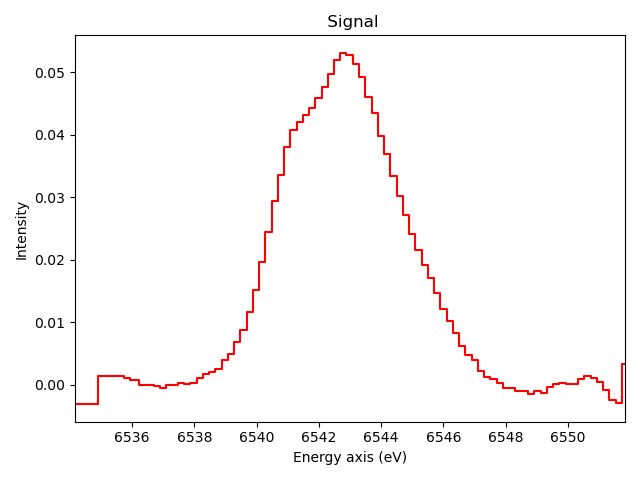

In [6]:
from hyperspy.axes import DataAxis
energy_Mn_FD1st_ex = Mn_FD1st_ex.iloc[:, 0].to_numpy(dtype='float64')
energy_Mn_FD1st_ex = DataAxis(axis=energy_Mn_FD1st_ex, index_in_array=None, name='Energy', units='eV',)
FD1st_ex = hs.signals.Signal1D(Mn_FD1st_ex.iloc[:, 1], axes=[energy_Mn_FD1st_ex,])
FD1st_ex = FD1st_ex.isig[6532.0:].deepcopy()
FD1st_ex.plot()

In [7]:
FD1st_ex_model = FD1st_ex.create_model()
FD1st_ex_model.extend((model_refMn_III, model_refMn_IV))
FD1st_ex_model.set_signal_range(6536.0, 6550.0)

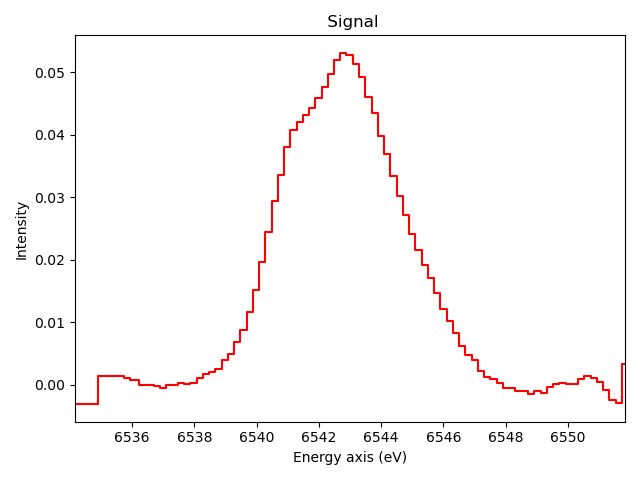

Parameter Name,Free,Value,Std,Min,Max,Linear
yscale,True,0.487958,0.0328948,0,,True
xscale,True,1.09617,0.0080072,,,False
shift,True,628.96,52.385,,,False
Parameter Name,Free,Value,Std,Min,Max,Linear
yscale,True,0.473371,0.0181611,0,,True
xscale,True,1.07744,0.00511501,,,False
shift,True,506.476,33.4675,,,False


In [8]:
%matplotlib widget
plt.close('all')
FD1st_ex_model.fit(optimizer="lm", bounded=True, return_info=False) 
FD1st_ex_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_23_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_23_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
FD1st_ex_model.print_current_values()

In [9]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_III']).data])
fit_Mn_III = fit_Mn_III.T
fit_Mn_III.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]))
pre_edge_ratio_Mn_III = scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]))

pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III

(0.6344609887770668, 0.3655390112229331)

In [ ]:
Pre_Edge_aMnO2 = xr.Dataset(
    data_vars=dict(
        aMnO2 = (['Energy_aMnO2'], FD1st_ex.data),
        fit = (['Energy_fit'], FD1st_ex_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_III']).data),
        ),
    coords=dict(
        Energy_aMnO2 = FD1st_ex.axes_manager[0].axis,
        Energy_fit= FD1st_ex_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        chisq = FD1st_ex_model.chisq.data[0],
        red_chisq = FD1st_ex_model.red_chisq.data[0],
    ),
)

FD1st_ex_model.save_parameters2file(path.joinpath(path_out, r'FD1st_ex_model_parameters_ref_2'))
FD1st_ex_model.save(path.joinpath(path_out, r'FD1st_ex_model_ref_2'), 'model', overwrite=True)
Pre_Edge_aMnO2.to_netcdf(path.joinpath(path_out, r'FD1st_ex_result_ref_2.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
plt.close('all')
%matplotlib inline
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 B
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)

ax.plot(data.iloc[:, 4], data.iloc[:, 7]+0.08, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+0.08, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+0.08, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(FD1st_ex.axes_manager[0].axis, FD1st_ex.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_III.iloc[:, 0], fit_Mn_III.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_24_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_24_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()

#### 拟合峰形, IV + III (pseudo-Voigt 峰 - 三个) + II (pseudo-Voigt 峰 - 一个)

In [ ]:
# 数据清洗
Mn_IV = data.iloc[:, [8, 11]].copy().dropna(axis=0, how='all')
Mn_IV.iloc[115:, 1] = 0

# 将 refMn_I//III/IV 做成一个 scale model
from hyperspy.axes import DataAxis
energy_refMn_IV = Mn_IV.iloc[:, 0].to_numpy(dtype='float64')
energy_refMn_IV = DataAxis(axis=energy_refMn_IV, index_in_array=None, name='Energy', units='eV',)
refMn_IV = hs.signals.Signal1D(Mn_IV.iloc[:, 1], axes=[energy_refMn_IV,])
model_refMn_IV = hs.model.components1D.ScalableFixedPattern(refMn_IV) 

# 初始化上述的模型
model_refMn_IV.name= r'Mn_IV'
# model_refMn_IV.xscale.value=1.0
# model_refMn_IV.shift.value=0
# model_refMn_IV.set_parameters_not_free(parameter_name_list=['xscale', 'shift',])
model_refMn_IV.yscale.bmin=0.0

# III 的模型
pv1 = hs.model.components1D.Voigt(centre=6541.14, sigma=0.62343, gamma=0.55, module='scipy')
pv1.name = r'Mn_III_1'
pv1.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv1.centre.bmin = 6538.0
pv1.centre.bmax = 6542.5
pv1.area.bmin = 0

pv2 = hs.model.components1D.Voigt(centre=6544.73, sigma=0.62343, gamma=0.55, module='scipy')
pv2.set_parameters_not_free(parameter_name_list=['centre',])
pv2.name = r'Mn_III_2'
pv2.centre.bmin = 6543.0
pv2.centre.bmax = 6545.0
pv2.area.bmin = 0
pv2.sigma.twin = pv1.sigma
pv2.gamma.twin = pv1.gamma
pv2.area.twin_function_expr = '0.74805*x'
pv2.area.twin = pv1.area

pv3 = hs.model.components1D.Voigt(centre=6543.11, sigma=0.62343, gamma=0.55, module='scipy')
pv3.set_parameters_not_free(parameter_name_list=['centre',])
pv3.name = r'Mn_III_3'
pv3.centre.bmin = pv1.centre.bmax - 0.5
pv3.centre.bmax = pv2.centre.bmin + 0.5
pv3.area.bmin = 0
pv3.sigma.twin = pv1.sigma
pv3.gamma.twin = pv1.gamma
pv3.area.twin_function_expr = '0.867960*x'
pv3.area.twin = pv1.area

# II 的模型
pv4 = hs.model.components1D.Voigt(centre=6540.77, sigma=0.62343, gamma=0.55, module='scipy')
pv4.name = r'Mn_II'
pv4.set_parameters_not_free(parameter_name_list=['centre', 'sigma', 'gamma',])
pv4.centre.bmin = 6540.0
pv4.centre.bmax = 6541.5
pv4.area.bmin = 0


In [ ]:
Mn_FD1st_ex = data.iloc[:, [20, 23]].copy().dropna(axis=0, how='all')

In [ ]:
from hyperspy.axes import DataAxis
energy_Mn_FD1st_ex = Mn_FD1st_ex.iloc[:, 0].to_numpy(dtype='float64')
energy_Mn_FD1st_ex = DataAxis(axis=energy_Mn_FD1st_ex, index_in_array=None, name='Energy', units='eV',)
FD1st_ex = hs.signals.Signal1D(Mn_FD1st_ex.iloc[:, 1], axes=[energy_Mn_FD1st_ex,])
FD1st_ex = FD1st_ex.isig[6532.0:].deepcopy()
FD1st_ex.plot()

In [ ]:
FD1st_ex_model = FD1st_ex.create_model()
FD1st_ex_model.extend((model_refMn_IV, pv1, pv2, pv3, pv4))
FD1st_ex_model.set_signal_range(6536.0, 6550.0)

In [ ]:
%matplotlib widget
plt.close('all')
FD1st_ex_model.fit(optimizer="lm", bounded=True, return_info=False) 
FD1st_ex_model.plot(plot_components=True, plot_residual=False)
plt.savefig(path.joinpath(path_out, r'PreEdge_25_300_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_25_600_V3_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
FD1st_ex_model.print_current_values()

In [ ]:
# 转化成 DataFrame
fit_Mn_IV = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_IV']).data])
fit_Mn_IV = fit_Mn_IV.T
fit_Mn_IV.dropna(how='any', inplace=True)

fit_Mn_III_1 = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_III_1']).data])
fit_Mn_III_1 = fit_Mn_III_1.T
fit_Mn_III_1.dropna(how='any', inplace=True)

fit_Mn_III_2 = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_III_2']).data])
fit_Mn_III_2 = fit_Mn_III_2.T
fit_Mn_III_2.dropna(how='any', inplace=True)

fit_Mn_III_3 = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_III_3']).data])
fit_Mn_III_3 = fit_Mn_III_3.T
fit_Mn_III_3.dropna(how='any', inplace=True)

fit_Mn_II = pd.DataFrame([FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal(component_list=['Mn_II']).data])
fit_Mn_II = fit_Mn_II.T
fit_Mn_II.dropna(how='any', inplace=True)

# 计算比例
pre_edge_ratio_Mn_IV = scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_III = (scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]))/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_1.iloc[:, 1], x=fit_Mn_III_1.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_2.iloc[:, 1], x=fit_Mn_III_2.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III_3.iloc[:, 1], x=fit_Mn_III_3.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_II = scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0])/(scipy.integrate.simpson(y=fit_Mn_IV.iloc[:, 1], x=fit_Mn_IV.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_III.iloc[:, 1], x=fit_Mn_III.iloc[:, 0]) + scipy.integrate.simpson(y=fit_Mn_II.iloc[:, 1], x=fit_Mn_II.iloc[:, 0]))
pre_edge_ratio_Mn_IV, pre_edge_ratio_Mn_III, pre_edge_ratio_Mn_II

In [ ]:
Pre_Edge_FD1st = xr.Dataset(
    data_vars=dict(
        FD1st = (['Energy_FD1st'], FD1st_ex.data),
        fit = (['Energy_fit'], FD1st_ex_model.as_signal().data),
        fit_Mn_IV = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_IV']).data),
        fit_Mn_III_1 = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_III_1']).data),
        fit_Mn_III_2 = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_III_2']).data),
        fit_Mn_III_3 = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_III_3']).data),
        fit_Mn_II = (['Energy_fit'], FD1st_ex_model.as_signal(component_list=['Mn_II']).data),
        ),
    coords=dict(
        Energy_FD1st = FD1st_ex.axes_manager[0].axis,
        Energy_fit= FD1st_ex_model.axes_manager[0].axis,
    ),
    attrs=dict(
        ratio_Mn_IV = pre_edge_ratio_Mn_IV,
        ratio_Mn_III = pre_edge_ratio_Mn_III,
        ratio_Mn_II = pre_edge_ratio_Mn_II,
        chisq = FD1st_ex_model.chisq.data[0],
        red_chisq = FD1st_ex_model.red_chisq.data[0],
    ),
)

FD1st_ex_model.save_parameters2file(path.joinpath(path_out, r'FD1st_ex_model_parameters_ref_1_voigt_3_voigt_1'))
FD1st_ex_model.save(path.joinpath(path_out, r'FD1st_ex_model_ref_1_voigt_3_voigt_1'), 'model', overwrite=True)
Pre_Edge_FD1st.to_netcdf(path.joinpath(path_out, r'FD1st_ex_result_ref_1_voigt_3_voigt_1.NETCDF4'), engine="h5netcdf")

In [ ]:
# 画图
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(7, 2.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=None, wspace=0.0, hspace=0.0, figure=fig)

xas_colors_Mn = [colors[0], colors[4]]
xas_cmap_Mn = ListedColormap(mpl.colormaps['coolwarm'](np.linspace(0.5, 1.0, data.shape[1]//4-5)), name='xas_cmap_Mn', )
labels_Mn = [r'${\alpha}$-MnO$\mathrm{_2}$', r'0.2M Mn$\mathrm{^{2\!+}}$']

# 图 
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position((0, 0, 1.0, 1.0))
ax.set_box_aspect(0.8)
pad = 0.08
ax.plot(data.iloc[:, 4], data.iloc[:, 7]+pad, ls='-', color=colors[4], label=r'ref.MnO')
ax.plot(data.iloc[:, 0], data.iloc[:, 3]+pad, ls='-', color=colors[5], label=r'ref.Mn$\mathrm{_2O_3}$')
ax.plot(data.iloc[:, 8], data.iloc[:, 11]+pad, ls='-', color=colors[3], label=r'ref.Mn$\mathrm{O_2}$')
ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.02), ncols=1, frameon=False, fontsize=9, labelcolor='linecolor', columnspacing=0.0)

ax.plot(FD1st_ex.axes_manager[0].axis, FD1st_ex.data, ls='-', color='k', label=None)
ax.plot(fit_Mn_II.iloc[:, 0], fit_Mn_II.iloc[:, 1], ls='--', color=colors[4], label=None)
ax.plot(fit_Mn_IV.iloc[:, 0], fit_Mn_IV.iloc[:, 1], ls='--', color=colors[3], label=None)
ax.plot(fit_Mn_III_1.iloc[:, 0], fit_Mn_III_1.iloc[:, 1] + fit_Mn_III_2.iloc[:, 1] + fit_Mn_III_3.iloc[:, 1], ls='--', color=colors[5], label=None)
ax.plot(FD1st_ex_model.axes_manager[0].axis, FD1st_ex_model.as_signal().data, ls='--', color=colors[3], label=None)

ax.set_xlim(6535.0, 6550.0)
ax.set_xlabel(r'Energy (eV)', fontsize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=2.5, offset=0))
ax.set_ylim(-0.01, 0.20)
ax.set_ylabel(r'Relative Intensity (arb.u.)', fontsize=11,)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.025))

# ax.text(-0.25, 1.0, r'b', transform=ax.transAxes, fontsize=14, va='center', ha='right', fontfamily='Arial', fontweight='bold')

ax.axvline(x=6540.3, ymax=0.65, ls='--')
ax.axvline(x=6543.0, ymax=0.7, ls='--')

plt.savefig(path.joinpath(path_out, r'PreEdge_26_300_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'PreEdge_26_600_V3_0.tif'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=600, pil_kwargs={"compression": "tiff_lzw"})
plt.show()